In [1]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc

DATAFOLDER = '../data/'
IMAGE_FOLDER = DATAFOLDER + 'roof_images/'

In [2]:
df = pd.read_csv(DATAFOLDER + 'id_train.csv')
ids = list(df['Id'])
print(len(ids))
df.head()

8000


,Id,label
0,-3935637,4
1,-2815459,3
2,-2355684,3
3,-2343303,4
4,-1981985,2


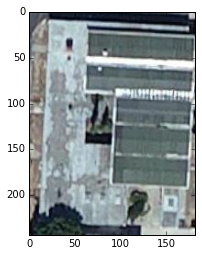

In [3]:
img_path = IMAGE_FOLDER + str(ids[1]) + '.jpg'
img = misc.imread(img_path)
plt.imshow(img)

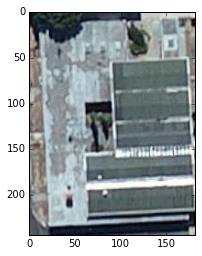

In [4]:
# horizontal flip
plt.imshow(img[::-1,:,:])

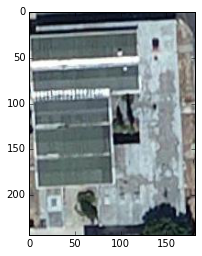

In [5]:
# Vertical flip
plt.imshow(img[:,::-1,:])

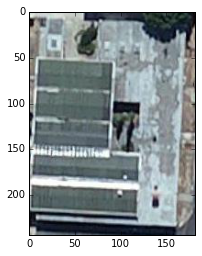

In [6]:
# Rotation 180°
plt.imshow(img[::-1,::-1,:])

Shape of initial image (244, 182, 3)
Pixel value for new image [ 128.  142.  142.]
Corresponding pixel value for old image [128 142 142]


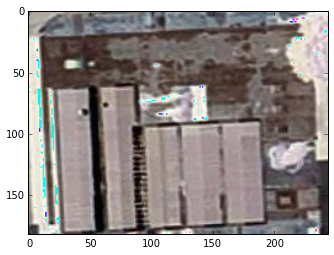

In [8]:
# Transpose ca chie mais j'arrive pas a savoir pourquoi..
new_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]))
for i in range(3):
    new_img[:,:,i] = img[:,:,i].transpose()
    
#for i in range(img.shape[0]):
#    for j in range(img.shape[1]):
#        new_img[j,i,:] = img[i,j,:]
plt.imshow(new_img)

i, j = 25, 100
print 'Shape of initial image', img.shape
print 'Pixel value for new image', new_img[j,i,:]
print 'Corresponding pixel value for old image', img[i,j,:]